# BoomBikes Business Analysis
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

# Goal
The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands

# Basic component used information
Python version: 3.8.5 Numpy version : 1.19.2 Pandas version : 1.1.3 Seaborn version : 0.11.0

# Step:1 Understanding the dataset

Import necessary modules

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import scipy as sp
pd.set_option('mode.chained_assignment', None)
dtype={'user_id': int}
#Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
boombikes = pd.read_csv("dataset/day.csv")

Inspect/Analyze various aspects of the boombikes data

In [3]:
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
boombikes.shape

(730, 16)

In [5]:
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


No Null values so no null processing and not many variables!!! Phew!! :-)

# Remove irrelevant columns
instant looks to not much of use as its a running record index.Let's have a look at instant variable.

In [6]:
boombikes.instant

0        1
1        2
2        3
3        4
4        5
      ... 
725    726
726    727
727    728
728    729
729    730
Name: instant, Length: 730, dtype: int64

yes, instant can be removed

In [7]:
boombikes.drop('instant', axis=1, inplace=True)
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.7+ KB


Analyze other columns

In [8]:
boombikes.dteday.unique()

array(['01-01-2018', '02-01-2018', '03-01-2018', '04-01-2018',
       '05-01-2018', '06-01-2018', '07-01-2018', '08-01-2018',
       '09-01-2018', '10-01-2018', '11-01-2018', '12-01-2018',
       '13-01-2018', '14-01-2018', '15-01-2018', '16-01-2018',
       '17-01-2018', '18-01-2018', '19-01-2018', '20-01-2018',
       '21-01-2018', '22-01-2018', '23-01-2018', '24-01-2018',
       '25-01-2018', '26-01-2018', '27-01-2018', '28-01-2018',
       '29-01-2018', '30-01-2018', '31-01-2018', '01-02-2018',
       '02-02-2018', '03-02-2018', '04-02-2018', '05-02-2018',
       '06-02-2018', '07-02-2018', '08-02-2018', '09-02-2018',
       '10-02-2018', '11-02-2018', '12-02-2018', '13-02-2018',
       '14-02-2018', '15-02-2018', '16-02-2018', '17-02-2018',
       '18-02-2018', '19-02-2018', '20-02-2018', '21-02-2018',
       '22-02-2018', '23-02-2018', '24-02-2018', '25-02-2018',
       '26-02-2018', '27-02-2018', '28-02-2018', '01-03-2018',
       '02-03-2018', '03-03-2018', '04-03-2018', '05-03

Looks like dteday also can be dropped

In [9]:
boombikes.drop('dteday', axis=1, inplace=True)

From problem statement registered and casual add up to cnt which is target variable. So registered and casual can be removed.

In [10]:
boombikes.drop('registered', axis=1, inplace=True)
boombikes.drop('casual', axis=1, inplace=True)

'temp' and 'atemp' looks like linearly related as when temp increases atemp also will increase. Let's look at their correlation if understanding is correct.

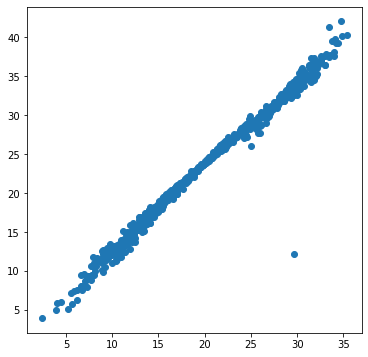

In [11]:
plt.figure(figsize=[6,6])
plt.scatter(boombikes.temp, boombikes.atemp)
plt.show()

Yes, very good linear relation. Let's remove one of them.

In [12]:
boombikes.drop('atemp', axis=1, inplace=True)

We are done with initial clean. Let's see how dataset looks like now.

In [13]:
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


# Check for Linear Regression and Colinearity

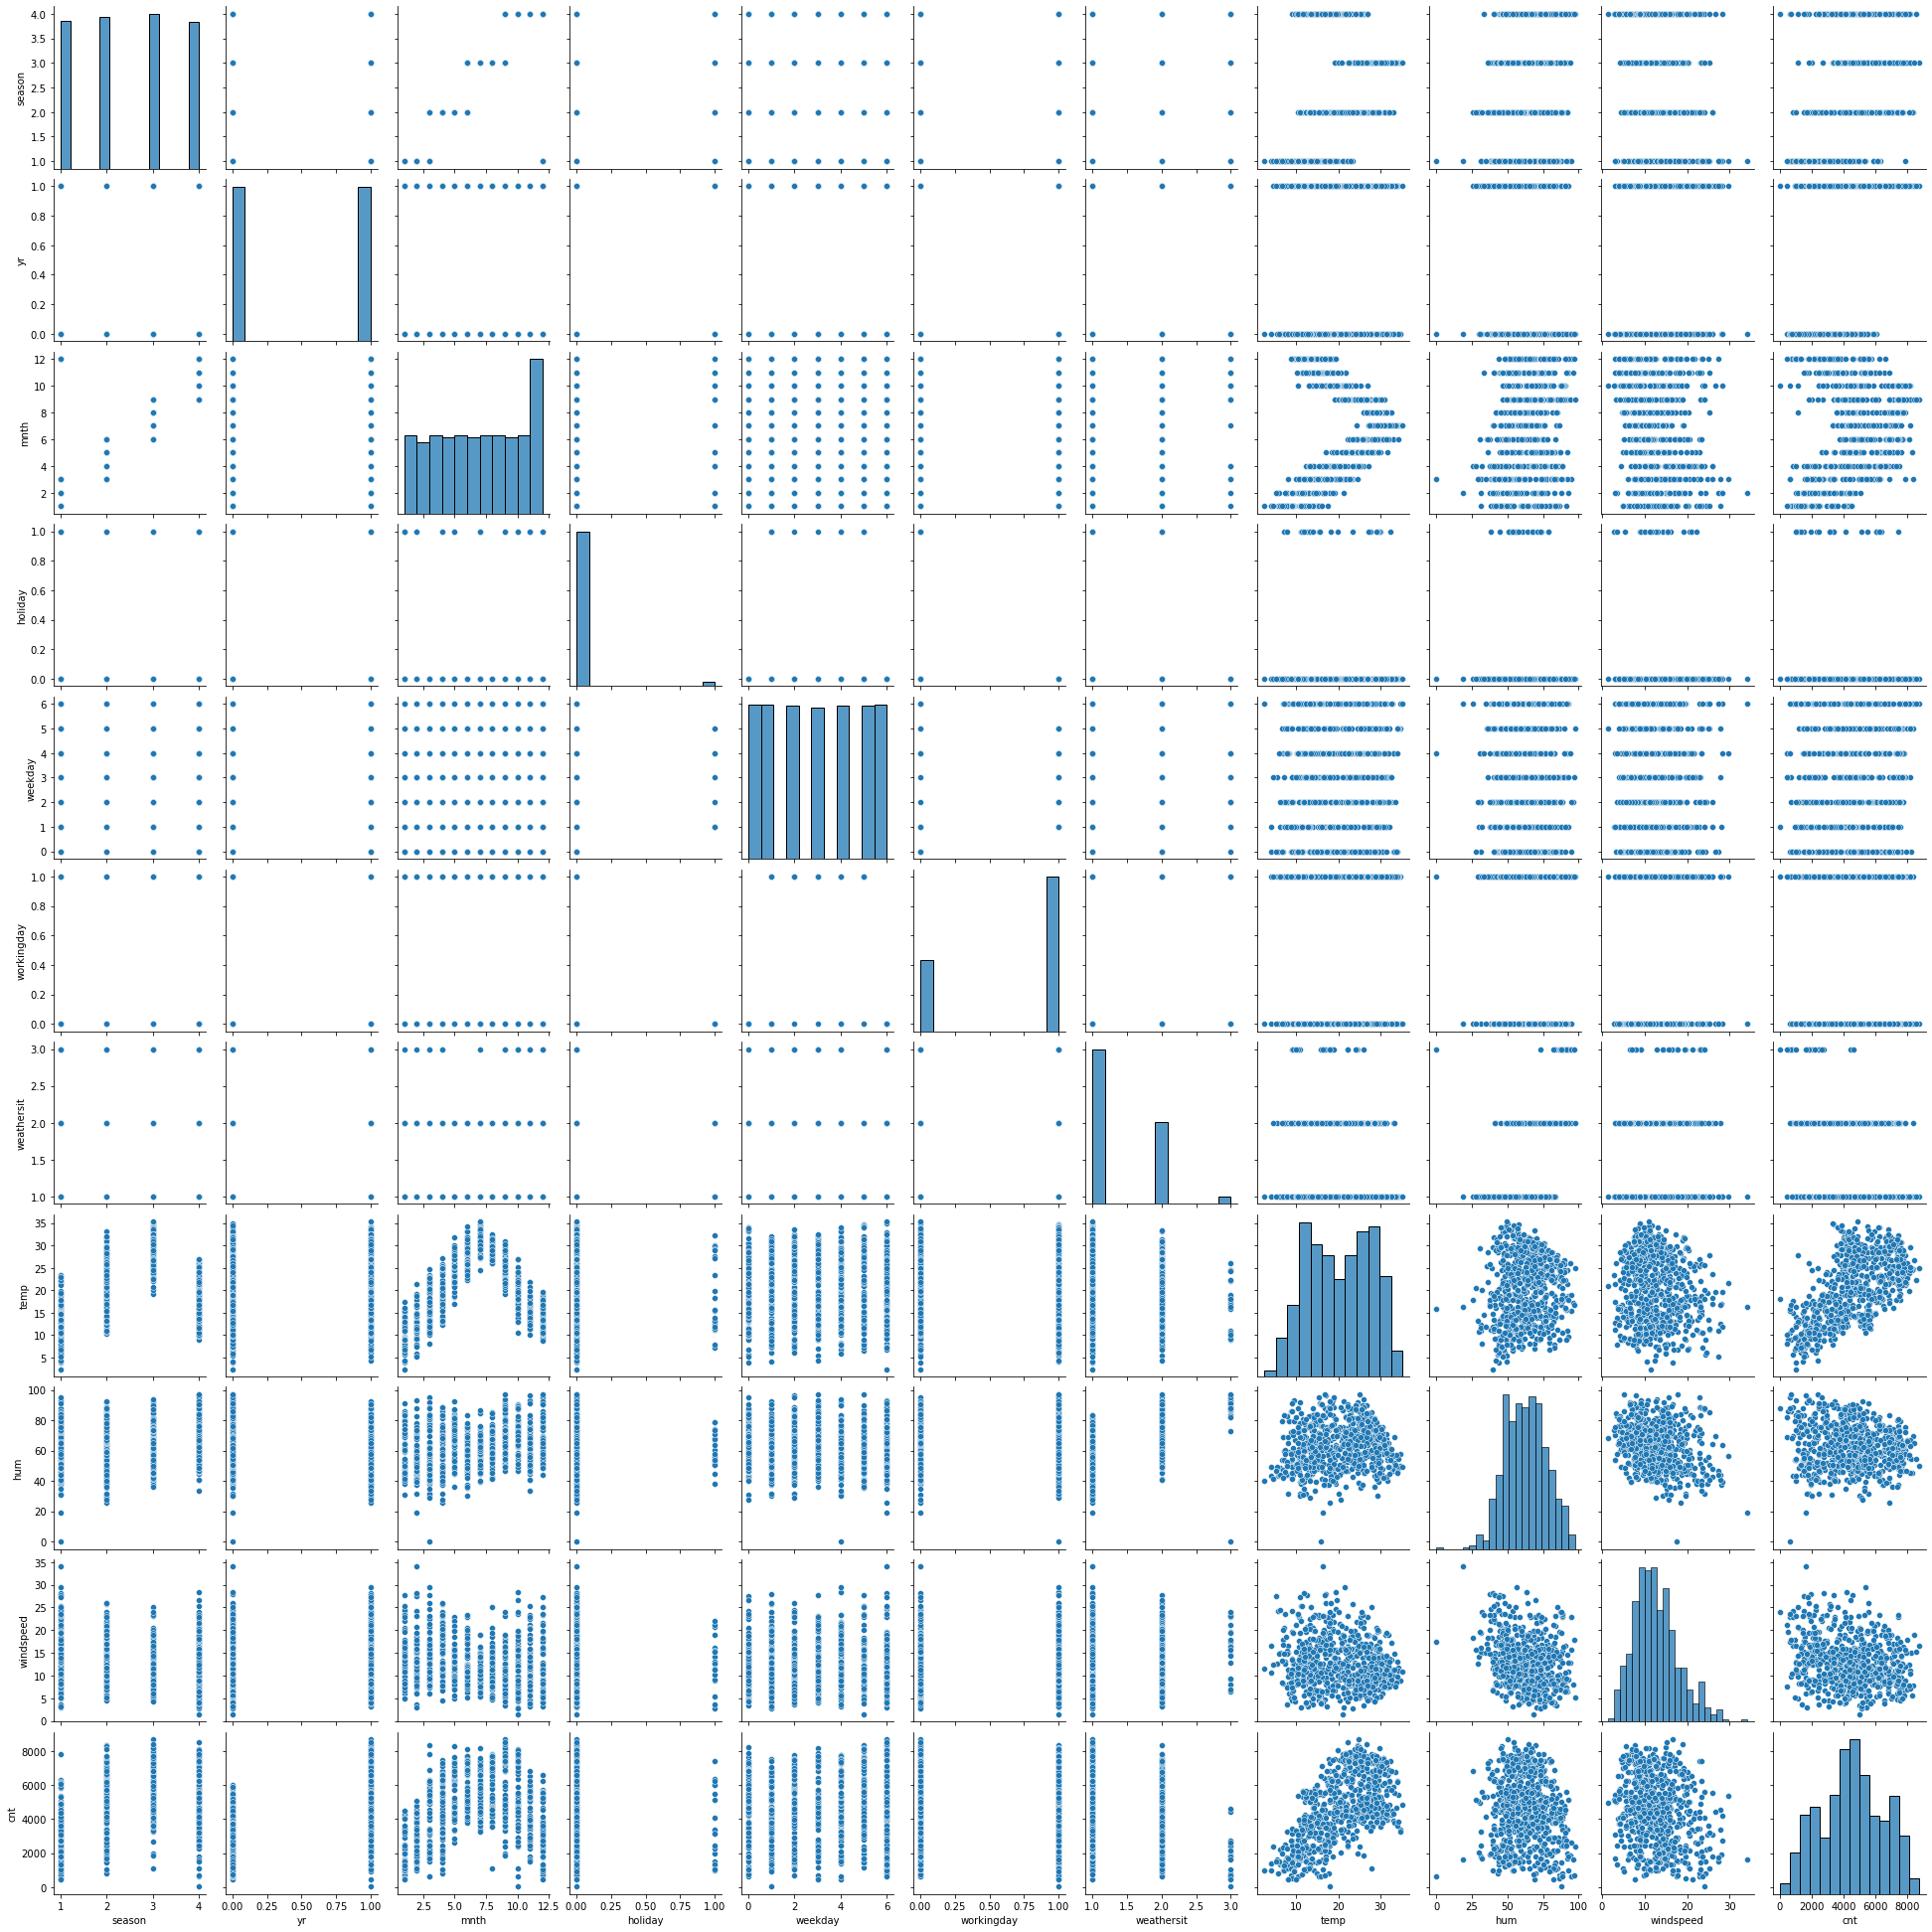

In [14]:
sns.pairplot(boombikes)
plt.show()

Let's look at correlation identity matrix also to identify dependencies

In [15]:
corr = boombikes.corr()
corr.style.background_gradient(cmap='coolwarm')

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
season,1.000000,-0.000000,0.831032,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.208220,-0.229607,0.404584
yr,-0.000000,1.000000,-0.000000,0.008195,-0.005466,-0.002945,-0.050322,0.048789,-0.112547,-0.011624,0.569728
mnth,0.831032,-0.000000,1.000000,0.018905,0.009523,-0.004688,0.045613,0.219083,0.224937,-0.208013,0.278191
holiday,-0.010868,0.008195,0.018905,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.015662,0.006257,-0.068764
weekday,-0.003081,-0.005466,0.009523,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.052290,0.014283,0.067534
workingday,0.013762,-0.002945,-0.004688,-0.252948,0.035800,1.000000,0.060236,0.053470,0.023202,-0.018666,0.062542
weathersit,0.021306,-0.050322,0.045613,-0.034395,0.031112,0.060236,1.000000,-0.119503,0.590277,0.039769,-0.295929
temp,0.333361,0.048789,0.219083,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.128565,-0.158186,0.627044
hum,0.208220,-0.112547,0.224937,-0.015662,-0.052290,0.023202,0.590277,0.128565,1.000000,-0.248506,-0.098543
windspeed,-0.229607,-0.011624,-0.208013,0.006257,0.014283,-0.018666,0.039769,-0.158186,-0.248506,1.000000,-0.235132


From this heatmap we can see cnt strongly correlated to:
- season
- yr
- temp

Based on this linear regression can be considered.

Similarly with correlation matrix we see few variables having strong correlation with others
- mnth and season
- humidity and weather
etc..

So colinearity also exist.

# Data cleanup

From Problem statement - "You can observe in the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case (Check the data dictionary and think why). So, it is advisable to convert such feature values into categorical string values before proceeding with model building. Please refer the data dictionary to get a better understanding of all the independent variables." - So lets analyze 'weathersit' first

In [16]:
boombikes.weathersit.unique()

array([2, 1, 3], dtype=int64)

In [17]:
boombikes.weathersit = boombikes.weathersit.map({1: "Clear", 2: "Mist",3: "LightRain", 4: "HeavyRain"})
boombikes.weathersit

0       Mist
1       Mist
2      Clear
3      Clear
4      Clear
       ...  
725     Mist
726     Mist
727     Mist
728    Clear
729     Mist
Name: weathersit, Length: 730, dtype: object

In [18]:
boombikes.season = boombikes.season.map({1: "spring", 2: "summer",3: "fall", 4: "winter"})
boombikes.season

0      spring
1      spring
2      spring
3      spring
4      spring
        ...  
725    spring
726    spring
727    spring
728    spring
729    spring
Name: season, Length: 730, dtype: object

In [19]:
#WeekDay also needs to converted to categorical variables. As per mentor session it was decided to use 0=Tuesday
boombikes.weekday = boombikes.weekday.map({0: 'Sun',1: 'Mon',2: 'Tue',3: 'Wed',4: 'Thu',5: 'Fri',6: 'Sat'})
print(boombikes.weekday.unique())

['Sat' 'Sun' 'Mon' 'Tue' 'Wed' 'Thu' 'Fri']


In [20]:
#Month also needs to converted to categorical variables. As per mentor session it was decided to use 0=Tuesday
boombikes.mnth = boombikes.mnth.map({1: 'Jan',2: 'Feb',3: 'Mar',4: 'Apr',5: 'May',6: 'Jun',7: 'Jul',8: 'Aug',9: 'Sep',10: 'Oct',11: 'Nov',12: 'Dec'})
print(boombikes.mnth.unique())

['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']


In [21]:
boombikes.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600
5,spring,0,Jan,0,Thu,1,Clear,8.378268,51.8261,6.000868,1606
6,spring,0,Jan,0,Fri,1,Mist,8.057402,49.8696,11.304642,1510
7,spring,0,Jan,0,Sat,0,Mist,6.765000,53.5833,17.875868,959
8,spring,0,Jan,0,Sun,0,Clear,5.671653,43.4167,24.250650,822
9,spring,0,Jan,0,Mon,1,Clear,6.184153,48.2917,14.958889,1321


# Convert temp, windspeed and humidity to a range.

<div class="alert alert-block alert-info">
<b>Note:</b> Update to this conversion : Commented back as results do not seem to be good with this. Lot of variables get infinite VIF value due to this. This did not look correct so commented.
</div>

In [22]:
#def temp_slab(temp) :
#    if (temp >= 34):
#        return 16;
#    elif (temp >= 32):
#        return 15
#    elif (temp >= 30):
#        return 14
#    elif (temp >= 28):
#        return 13
#    elif (temp >= 26) :
#        return 12
#    elif (temp >= 24):
#        return 11
#    elif (temp >= 22):
#        return 10
#    elif (temp >= 20):
#        return 9
#    elif (temp >= 18):
#        return 8
#    elif (temp >= 16):
#        return 7
#    elif (temp >= 14):
#        return 6
#    elif (temp >= 12):
#        return 5
#    elif (temp >= 10) :
#        return 4
#    elif (temp >= 8):
#         return 3
#    elif (temp >= 6):
#        return 2
#    elif (temp >= 4):
#        return 1
#    elif (temp >= 2):
#        return 0

#boombikes["temp"] = boombikes.temp.apply(temp_slab)
#boombikes["temp"].unique()

In [23]:
#def hum_slab(hum) :
#    if (hum >= 90):
#        return 9;
#    elif (hum >= 80):
#        return 8
#    elif (hum >= 70):
#        return 7
#    elif (hum >= 60):
#        return 6
#    elif (hum >= 50) :
#        return 5
#    elif (hum >= 40):
#        return 4
#    elif (hum >= 30):
#        return 3
#    elif (hum >= 20):
#        return 2
#    elif (hum >= 10):
#        return 1
#    else:
#        return 0
   
#boombikes["hum"] = boombikes.hum.apply(hum_slab)
#boombikes["hum"].unique()

In [24]:
#def windspeed_slab(windspeed) :
#    if (windspeed >= 35):
#        return 7;
#    elif (windspeed >= 30):
#        return 6
#    elif (windspeed >= 25):
#        return 5
#    elif (windspeed >= 20):
#        return 4
#    elif (windspeed >= 15) :
#        return 3
#    elif (windspeed >= 10):
#        return 2
#    elif (windspeed >= 5):
#        return 1
#    else:
#        return 0

#boombikes["windspeed"] = boombikes.windspeed.apply(windspeed_slab)
#boombikes["windspeed"].unique()

# Step 2 : EDA

# 2.1 Univariate Analysis

In [25]:
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


# Analyze data for outliers

'season', 'yr','mnth','holiday', 'weekday', 'workingday', 'weathersit' are categorical variables. We can analyze 'temp','hum' and 'windspeed' for outliers

<AxesSubplot:ylabel='temp'>

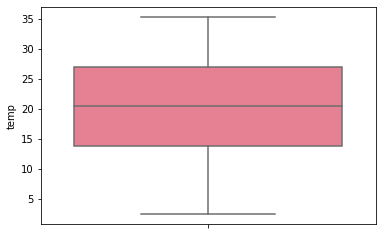

In [26]:
sns.boxplot(y=boombikes.temp, palette="husl")

<AxesSubplot:ylabel='hum'>

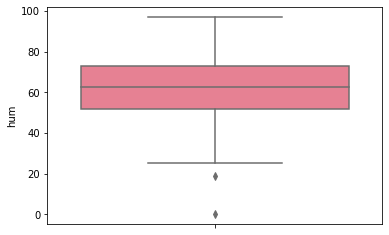

In [27]:
sns.boxplot(y=boombikes.hum, palette="husl")

<AxesSubplot:ylabel='windspeed'>

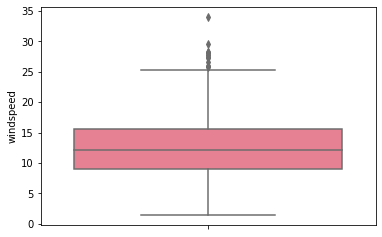

In [28]:
sns.boxplot(y=boombikes.windspeed, palette="husl")

All numerical continuous variables except windspeed look goot wrt outliers

Categorical Variable Analysis

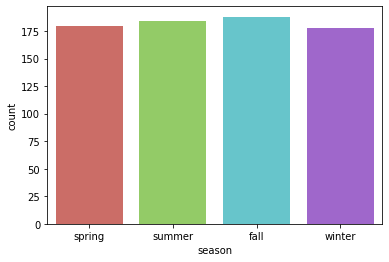

In [29]:
sns.countplot(x="season", data=boombikes, palette="hls")
plt.show()

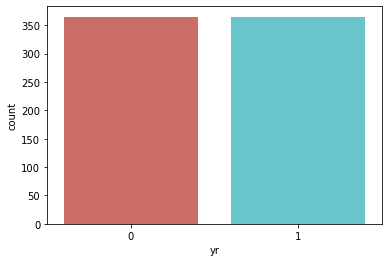

In [30]:
sns.countplot(x="yr", data=boombikes, palette="hls")
plt.show()

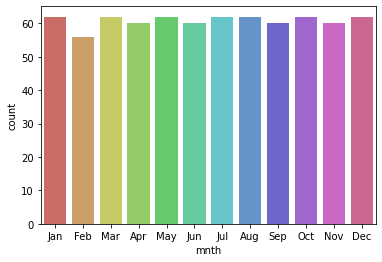

In [31]:
sns.countplot(x="mnth", data=boombikes, palette="hls")
plt.show()

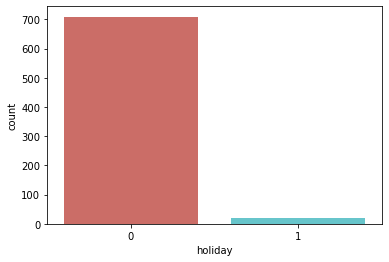

In [32]:
sns.countplot(x="holiday", data=boombikes, palette="hls")
plt.show()

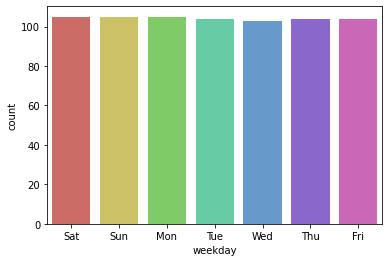

In [33]:
sns.countplot(x="weekday", data=boombikes,palette="hls")
plt.show()

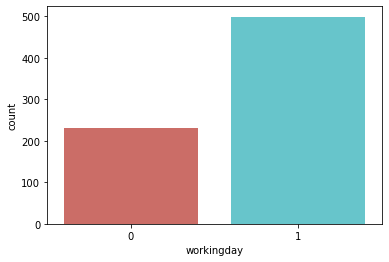

In [34]:
sns.countplot(x="workingday", data=boombikes, palette="hls")
plt.show()

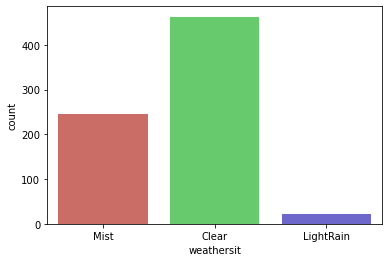

In [35]:
sns.countplot(x="weathersit", data=boombikes,palette="hls")
plt.show()

<div class="alert alert-block alert-success">
<b>Analysis:<br></b>Lot of entries found for <br>
- non-Holidays.<br>
- On working days.<br>
- Clear weather<br>

Probably these contribute to bike rentals.
</div>

# 2.2 Bivariate/Segmented Univariate Analysis

1. Boxplot - used for category-continuous variable analysis
2. Barplot - used for category-continuous variable analysis
3. countplots - used for category-category or category-continuous variable analysis
4. catplot - used for category-category variable analysis

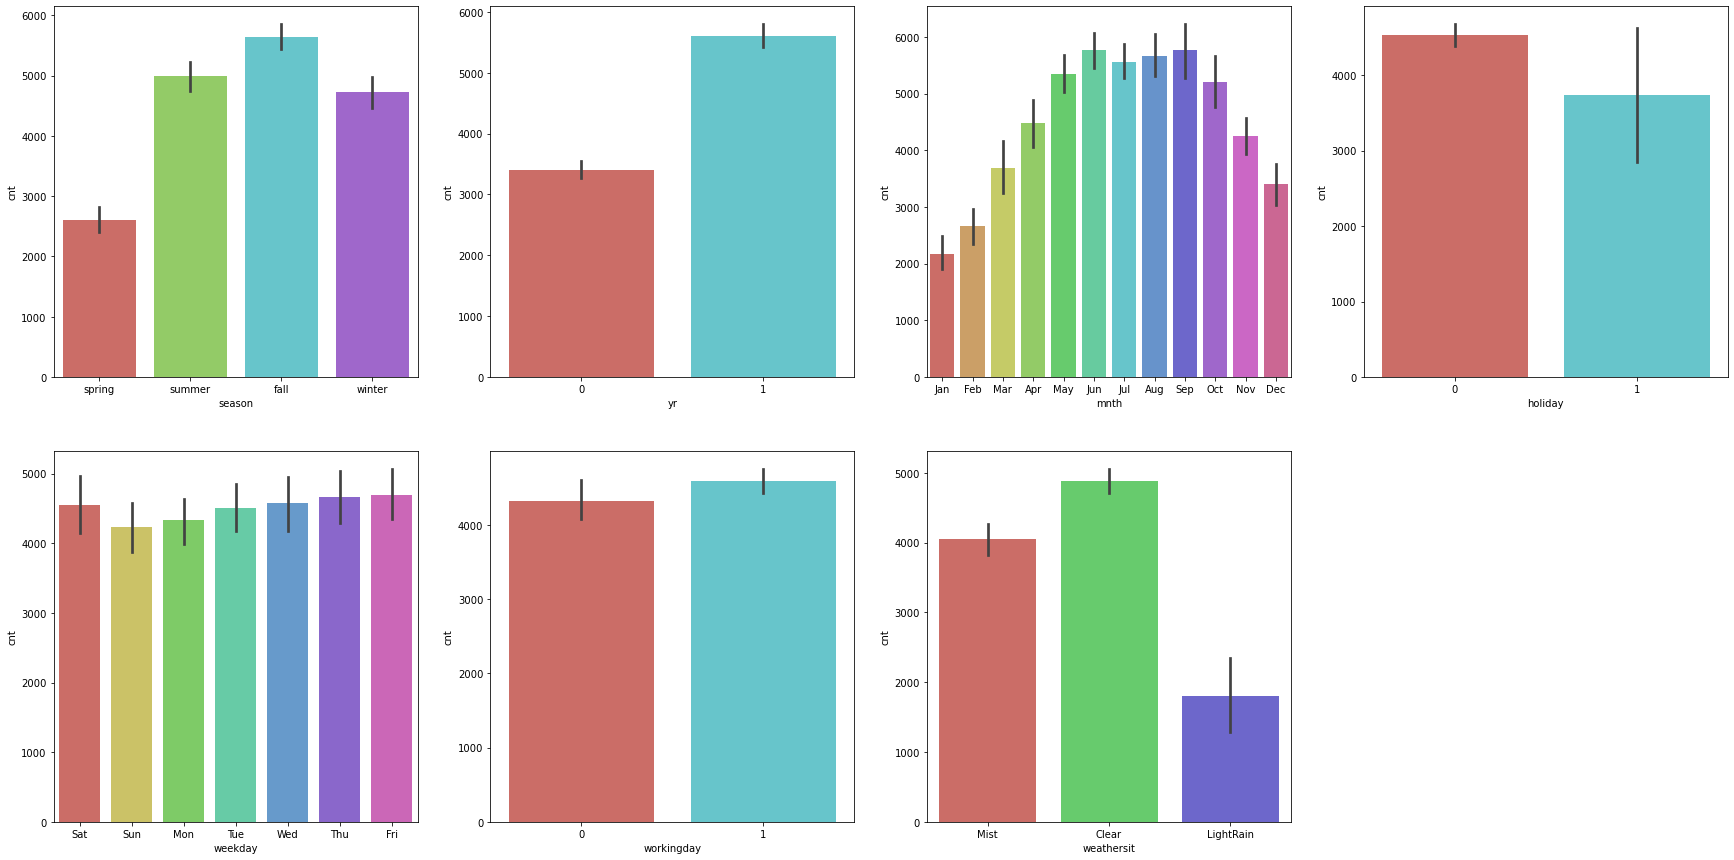

In [36]:
#Analyze continuous(cnt) and other categorical variables.
plt.figure(figsize=(30, 15))
plt.subplot(2,4,1)
sns.barplot(x=boombikes.season, y=boombikes.cnt,palette="hls")
plt.subplot(2,4,2)
sns.barplot(x=boombikes.yr, y=boombikes.cnt,palette="hls")
plt.subplot(2,4,3)
sns.barplot(x=boombikes.mnth, y=boombikes.cnt,palette="hls")
plt.subplot(2,4,4)
sns.barplot(x=boombikes.holiday, y=boombikes.cnt,palette="hls")
plt.subplot(2,4,5)
sns.barplot(x=boombikes.weekday, y=boombikes.cnt,palette="hls")
plt.subplot(2,4,6)
sns.barplot(x=boombikes.workingday, y=boombikes.cnt,palette="hls")
plt.subplot(2,4,7)
sns.barplot(x=boombikes.weathersit, y=boombikes.cnt,palette="hls")
plt.show()

<div class="alert alert-block alert-success">
<b>Analysis:<br></b>
- Bike rentals are good on non-Holidays.<br>
- Bike rentals are slightly preferred more on working days.<br>
- During falls bike rentals are more preferred.<br>
- Clear weather is more preferrable for bike rentals.<br>
</div>

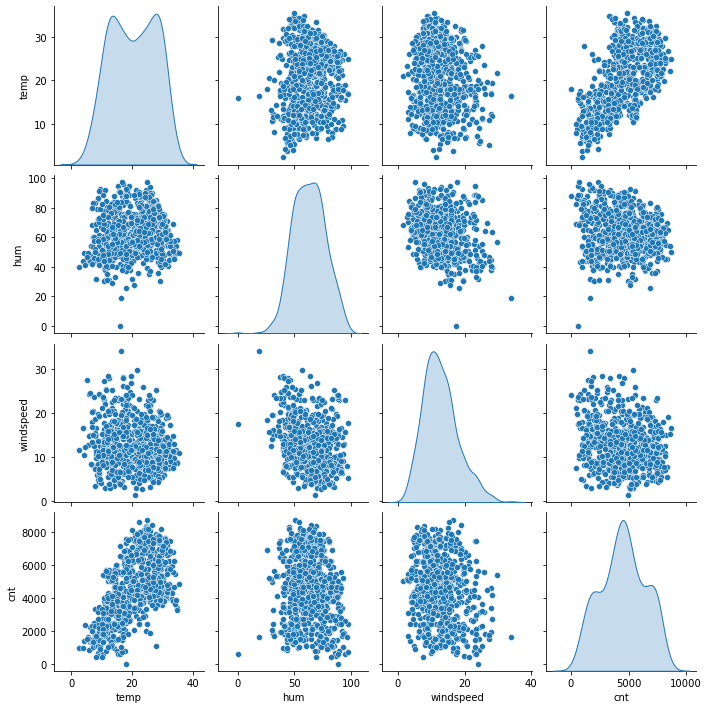

In [37]:
#Analyze continuous(cnt) and other continous variables.
sns.pairplot(boombikes, vars=["temp", "hum",'windspeed','cnt'],diag_kind="kde", kind="scatter", palette="husl")
plt.show()

<div class="alert alert-block alert-success">
<b>Analysis:<br></b>
- Bike rentals are higher between 20-30 Degree C.<br>
- At higher humidity bike rentals seems to be higher.<br>
- Windspeed has same observation as humidity.<br>
</div>


# 2.3 Multi-variate Analysis

# Step 3: Data prepation for model building

# 3.1 Create dummy variable for categorical variables

In [38]:
weathersit=pd.get_dummies(boombikes.weathersit, drop_first=True)
season=pd.get_dummies(boombikes.season, drop_first=True)
mnth=pd.get_dummies(boombikes.mnth, drop_first=True)
wkday=pd.get_dummies(boombikes.weekday, drop_first=True)
#Append dummy variables to dataset
boombikes = pd.concat([boombikes, weathersit], axis = 1)
boombikes = pd.concat([boombikes, season], axis = 1)
boombikes = pd.concat([boombikes, mnth], axis = 1)
boombikes = pd.concat([boombikes, wkday], axis = 1)

#Remove the variables from which dummy variables are derived.
boombikes.drop('weathersit', axis=1, inplace=True)
boombikes.drop('season', axis=1, inplace=True)
boombikes.drop('mnth', axis=1, inplace=True)
boombikes.drop('weekday', axis=1, inplace=True)

#Look at dataset after modification
boombikes.info()
boombikes.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   hum         730 non-null    float64
 5   windspeed   730 non-null    float64
 6   cnt         730 non-null    int64  
 7   LightRain   730 non-null    uint8  
 8   Mist        730 non-null    uint8  
 9   spring      730 non-null    uint8  
 10  summer      730 non-null    uint8  
 11  winter      730 non-null    uint8  
 12  Aug         730 non-null    uint8  
 13  Dec         730 non-null    uint8  
 14  Feb         730 non-null    uint8  
 15  Jan         730 non-null    uint8  
 16  Jul         730 non-null    uint8  
 17  Jun         730 non-null    uint8  
 18  Mar         730 non-null    uint8  
 19  May         730 non-null    u

,yr,holiday,workingday,temp,hum,windspeed,cnt,LightRain,Mist,spring,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,62.765175,12.763620,4508.006849,0.028767,0.336986,0.246575,...,0.084932,0.082192,0.084932,0.082192,0.143836,0.143836,0.143836,0.142466,0.142466,0.141096
std,0.500343,0.167266,0.465405,7.506729,14.237589,5.195841,1936.011647,0.167266,0.473004,0.431313,...,0.278971,0.274845,0.278971,0.274845,0.351164,0.351164,0.351164,0.349767,0.349767,0.348359
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
boombikes.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,LightRain,Mist,spring,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,0,14.110847,80.5833,10.749882,985,0,1,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,1,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,1,...,0,0,0,0,0,0,0,0,0,1


# 3.2 Split into train and split

In [40]:
df_train, df_test = train_test_split(boombikes, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


# 3.3  Rescaling the feature variables

In [41]:
scaler = MinMaxScaler()
cont_vars = ['temp', 'hum', 'windspeed', 'cnt']
df_train[cont_vars] = scaler.fit_transform(df_train[cont_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,LightRain,Mist,spring,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,0,...,0,0,1,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,1,1,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0,0,1,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [42]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,LightRain,Mist,spring,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.029412,0.343137,0.243137,...,0.084314,0.086275,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.169124,0.475223,0.429398,...,0.278131,0.281045,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
y_train = df_train.pop('cnt')
X_train = df_train

# Step 4: Data modelling and Evaluation

# Recursive Feature Elimination (RFE)
There are 27 feature variables which may be tedious to reduce to real predictor ones using manual method of p-value and Vif analysis. We can start with RFE and then use p-value/vif to reduce predictors.

<div class="alert alert-block alert-info">
<b>Note:</b> Tried with 20 variables first but ViF and pvalues keep fluctuating. p-value for some variables came below 0.05 but one removing features having high VIFs some features again got high p-value. It gave high VIF for temp which does not look correct as cnt is quite dependent on temp.Then tried with 15 variables which seem to work well. So showing result with 15 variables but I feel 20 would be a good number if it works.
</div>


In [44]:
lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr, 15)
rfe = rfe.fit(X_train, y_train)

In [45]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('LightRain', True, 1),
 ('Mist', True, 1),
 ('spring', True, 1),
 ('summer', False, 13),
 ('winter', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 2),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 8),
 ('Mar', False, 10),
 ('May', False, 5),
 ('Nov', False, 3),
 ('Oct', False, 9),
 ('Sep', True, 1),
 ('Mon', False, 6),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 12),
 ('Tue', False, 14),
 ('Wed', False, 11)]

In [46]:
#Build the model and get the summary
X_train_sm = X_train[X_train.columns[rfe.support_]]
X_train_sm = sm.add_constant(X_train_sm)
lm = sm.OLS(y_train,X_train_sm).fit()
print(lm.summary())
X_train_sm = X_train_sm.drop(['const'], axis = 1)
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.0
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          4.03e-190
Time:                        13:04:40   Log-Likelihood:                 514.17
No. Observations:                 510   AIC:                            -998.3
Df Residuals:                     495   BIC:                            -934.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2503      0.025      9.865      0.0

As per quide lines to remove 
High pvalue and high VIFs (Guideline is to use VIFs < 5)
High-Low combination
- High p-value, low VIF - remove these first
- Low p-value, high VIF- 2nd remove these
Low p-value and Low VIF

Based on this guideline **'holiday'** with value **0.776** is first candidate to be removed.

In [47]:
X_train_sm = X_train_sm.drop(["holiday"], axis = 1)
X_train_sm = sm.add_constant(X_train_sm)
lm = sm.OLS(y_train,X_train_sm).fit()
print(lm.summary())
X_train_sm = X_train_sm.drop(['const'], axis = 1)
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.0
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          4.03e-190
Time:                        13:04:40   Log-Likelihood:                 514.17
No. Observations:                 510   AIC:                            -998.3
Df Residuals:                     495   BIC:                            -934.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2443      0.040      6.120      0.0

,Features,VIF
3,hum,29.73
2,temp,18.10
1,workingday,17.04
12,Sat,4.60
4,windspeed,4.55
13,Sun,4.47
7,spring,3.11
6,Mist,2.28
8,winter,2.18
0,yr,2.09


Expected R-squared and Adj. R-squared to go down but they remain same at 0.845 and 0.841. Let's analyze and remove more irrelevant features.
- All p-values are in range (<0.05). So looking high VIFs 'hum' is the next candidate.

In [48]:
X_train_sm = X_train_sm.drop(["hum"], axis = 1)
X_train_sm = sm.add_constant(X_train_sm)
lm = sm.OLS(y_train,X_train_sm).fit()
print(lm.summary())
X_train_sm = X_train_sm.drop(['const'], axis = 1)
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.3
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          3.12e-188
Time:                        13:04:40   Log-Likelihood:                 506.90
No. Observations:                 510   AIC:                            -985.8
Df Residuals:                     496   BIC:                            -926.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1686      0.035      4.817      0.0

,Features,VIF
1,workingday,13.48
2,temp,12.76
3,windspeed,4.51
11,Sat,3.85
12,Sun,3.60
6,spring,2.85
0,yr,2.07
7,winter,1.79
8,Jan,1.65
5,Mist,1.58


R-squared and Adj. R-squared have gone down but not considerably. Let's analyze and remove more irrelevant features.

All p-values are in range (<0.05). So looking high VIFs 'workingday' is the next candidate.

In [49]:
X_train_sm = X_train_sm.drop(["workingday"], axis = 1)
X_train_sm = sm.add_constant(X_train_sm)
lm = sm.OLS(y_train,X_train_sm).fit()
print(lm.summary())
X_train_sm = X_train_sm.drop(['const'], axis = 1)
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif= vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.5
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          4.99e-186
Time:                        13:04:40   Log-Likelihood:                 498.87
No. Observations:                 510   AIC:                            -971.7
Df Residuals:                     497   BIC:                            -916.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2691      0.025     10.924      0.0

,Features,VIF
1,temp,4.75
2,windspeed,4.04
5,spring,2.26
0,yr,2.06
7,Jan,1.60
4,Mist,1.53
6,winter,1.41
8,Jul,1.36
10,Sat,1.22
9,Sep,1.20


In [50]:
X_train_sm = X_train_sm.drop(["Sat"], axis = 1)
X_train_sm = sm.add_constant(X_train_sm)
lm = sm.OLS(y_train,X_train_sm).fit()
print(lm.summary())
X_train_sm = X_train_sm.drop(['const'], axis = 1)
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     229.1
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          8.08e-187
Time:                        13:04:40   Log-Likelihood:                 497.93
No. Observations:                 510   AIC:                            -971.9
Df Residuals:                     498   BIC:                            -921.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2719      0.025     11.068      0.0

,Features,VIF
1,temp,4.69
2,windspeed,4.01
5,spring,2.25
0,yr,2.06
7,Jan,1.60
4,Mist,1.53
6,winter,1.40
8,Jul,1.36
9,Sep,1.20
10,Sun,1.17


<div class="alert alert-block alert-success">
<b>Complete:</b> All p-values are in range (<0.05) and VIFs also in range (>5). So we seem to have arrived at relevant feature list.
</div>

|  Feature  |   coef   |
| --------- | -------- |
| yr        | 0.2352   |
| temp      | 0.4322   |
| windspeed |-0.1501   |
| LightRain |-0.2882   |
| Mist      |-0.0801   |
| spring    |-0.1034   |
| winter    | 0.0420   |
| Jan       |-0.0445   |
| Jul       |-0.0660   |
| Sep       | 0.0536   |
| Sun       |-0.0448   |

# Step 5: Residual Analysis of the train data
It's important to perform residual analysis for linear regression model.For this plot the histogram of error terms and check if it follows a normal distribution.

<div class="alert alert-block alert-info">
<b>Error term:</b> difference of actual target and predicted target value.
</div>

In [51]:
X_train_lm = sm.add_constant(X_train_sm)
y_train_pred = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

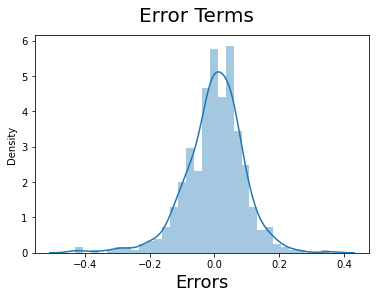

In [52]:
# Plot the histogram of the error terms
fig = plt.figure()
residual=y_train - y_train_pred

sns.distplot((residual))
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)  

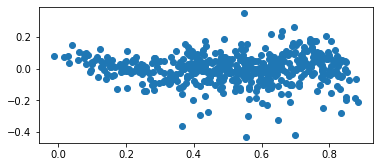

In [53]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_train_pred, residual)

In [54]:
np.mean(residual)

-3.898678765444723e-15

Great! error terms follow near normal distribution with mean at 0.

# Step 6: Making Predictions Using the Final Model

In [55]:
continuous_vars=['temp','hum','windspeed','cnt']
df_test[continuous_vars] = scaler.transform(df_test[continuous_vars])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,LightRain,Mist,spring,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,1,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,0,0,...,0,0,0,0,0,0,0,0,0,1
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,1,0,...,0,0,1,0,0,0,0,1,0,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,1
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [56]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,LightRain,Mist,spring,summer,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.027397,0.319635,0.255708,0.264840,...,0.086758,0.073059,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.163612,0.467403,0.437258,0.442259,...,0.282125,0.260830,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
X_train_sm = X_test[X_train_sm.columns]
X_train_sm = sm.add_constant(X_train_sm)
X_train_sm.head()

,const,yr,temp,windspeed,LightRain,Mist,spring,winter,Jan,Jul,Sep,Sun
184,1.0,0,0.831783,0.084219,0,1,0,0,0,1,0,0
535,1.0,1,0.901354,0.153728,0,0,0,0,0,0,0,0
299,1.0,0,0.511964,0.334206,0,1,0,1,0,0,0,0
221,1.0,0,0.881625,0.339570,0,0,0,0,0,0,0,0
152,1.0,0,0.817246,0.537414,0,0,0,0,0,0,0,0


In [58]:
y_pred = lm.predict(X_train_sm)

# Step 8: Calculate R-squared to check if it matches the model R-squared.

In [59]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8050405644499643

In [60]:
#r2 score of the training set
r2_train = r2_score(y_true=y_train, y_pred= y_train_pred)
print(r2_train)

0.8349707097505721


Matches the R-square of final model was **0.835**!!!

Check how the model prediction looks like with the actual train data. We can plot a scatter plot of y_test and y_pred and check if we get linear relation.

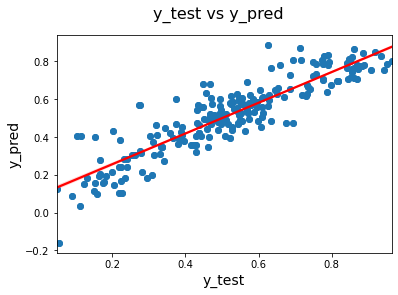

In [61]:
fig = plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=52, fit_reg=True, line_kws={"color": "red"})
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 16)               
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 14) 
plt.show()

**Looks good!**
Considering the final features listed below we get the following line equation

|  Feature  |   coef   |
| --------- | -------- |
| yr        | 0.2352   |
| temp      | 0.4322   |
| windspeed |-0.1501   |
| LightRain |-0.2882   |
| Mist      |-0.0801   |
| spring    |-0.1034   |
| winter    | 0.0420   |
| Jan       |-0.0445   |
| Jul       |-0.0660   |
| Sep       | 0.0536   |
| Sun       |-0.0448   |

- 0.2719 + (yr * 0.2352 + temp * 0.4322 + windspeed * -0.1501 + LightRain * -0.2882 + Mist * 0.0801 + spring * -0.1034 + winter * 0.0420 + Jan * -0.0445 + Jul * -0.0660 + Sep * 0.0536 + Sun * -0.0448)

# Summary:
## Considering major contributors:
- Temperature(**coef:0.4322**) is major contributor to bike rentals. A one unit increase in temperature the rentals increase by 0.4322 units. So increase in temperature will cause increase in bike rental.
- Year(**coef:0.2352**) also has significance where 2019 contributed more towards sale.
- Decrease in rain(**coef:-0.2882**) will cause increase in sale.
- Decrease in wind speed(**-0.1501**) will cause increase in sale.
